In [1]:
from modules.perturbations import perform_omission, perform_inclusion, perform_bias, merge_cell_images
import tifffile
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The function creates a 3D numpy array out of multiple volume slices
def get_volume(volume_filenames):
    slices = []

    for vf in volume_filenames:
        sl = tifffile.imread(vf)
        slices.append(sl)

    
    return np.array(slices)

In [3]:
# The path to the volume slices
ds_path = 'sample_data/hl60/'
ds_extra_path = 'sample_data/granulocytes/'

In [4]:
# Retrieve the file names from the path
volume_filenames_img = glob(ds_path + '*final*_0000_*')
volume_filenames_img = sorted(volume_filenames_img, key=lambda x: int(x.split('_')[-1].split('.')[0]))

volume_filenames_mask = glob(ds_path + '*label*_0000_*')
volume_filenames_mask = sorted(volume_filenames_mask, key=lambda x: int(x.split('_')[-1].split('.')[0]))

volume_filenames_img_extra = glob(ds_extra_path + '*final*_0000_*')
volume_filenames_img_extra = sorted(volume_filenames_img_extra, key=lambda x: int(x.split('_')[-1].split('.')[0]))

volume_filenames_mask_extra = glob(ds_extra_path + '*label*_0000_*')
volume_filenames_mask_extra = sorted(volume_filenames_mask_extra, key=lambda x: int(x.split('_')[-1].split('.')[0]))

In [5]:
# Load the volumes as 3D array
volume_main_img = get_volume(volume_filenames_img)
volume_main_mask = get_volume(volume_filenames_mask)
volume_extra_img = get_volume(volume_filenames_img_extra)
volume_extra_mask = get_volume(volume_filenames_mask_extra)

In [6]:
# Let's choose a slice to visualise
slice_number = 100

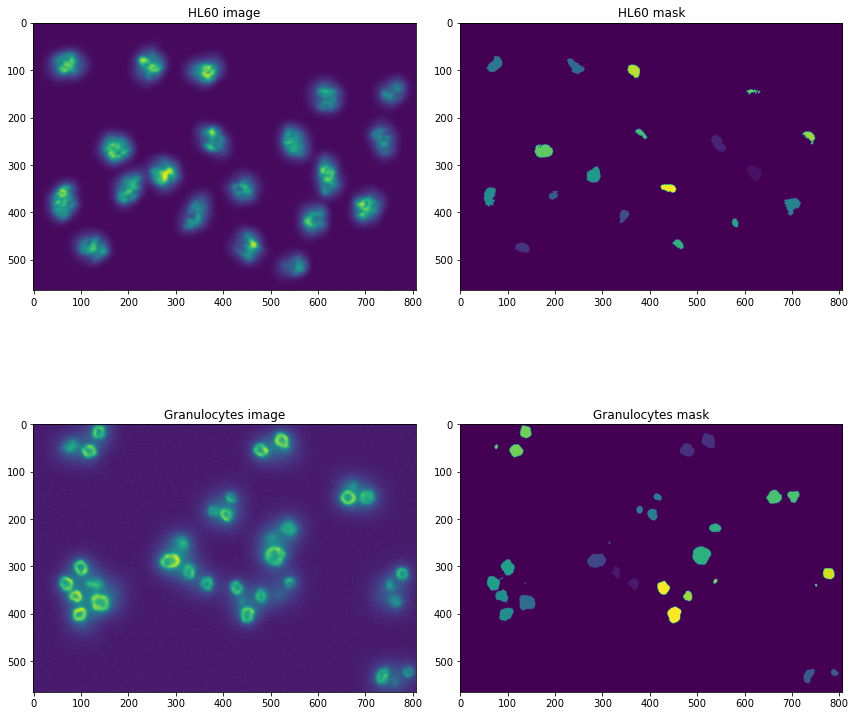

In [7]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=2, ncols=2)

axs[0, 0].imshow(volume_main_img[slice_number])
axs[0, 0].set_title('HL60 image')
axs[0, 1].imshow(volume_main_mask[slice_number])
axs[0, 1].set_title('HL60 mask')
axs[1, 0].imshow(volume_extra_img[slice_number])
axs[1, 0].set_title('Granulocytes image')
axs[1, 1].imshow(volume_extra_mask[slice_number])
axs[1, 1].set_title('Granulocytes mask')

fig.tight_layout()
plt.show()

# Omission

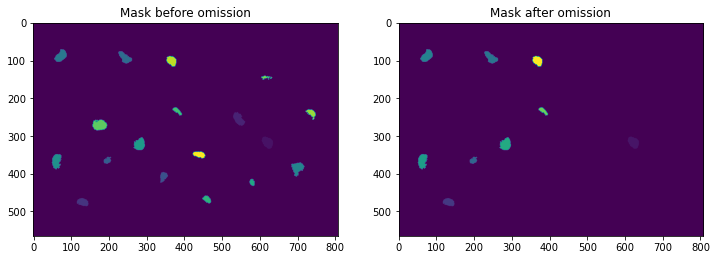

In [8]:
mask_omission = perform_omission(volume_main_mask.copy(), omission_rate=0.5)    # We send a copy as argument
                                                                                # such that the mask is not
fig, axs = plt.subplots(figsize=(12, 12), nrows=1, ncols=2)                     # in place

axs[0].imshow(volume_main_mask[slice_number])
axs[0].set_title('Mask before omission')
axs[1].imshow(mask_omission[slice_number])
axs[1].set_title('Mask after omission')

plt.show()

----

# Inclusion

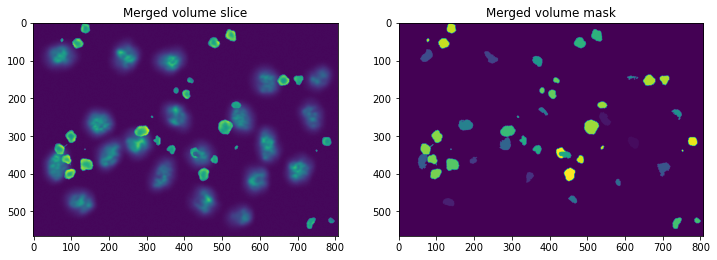

In [9]:
# We first merge the two synthetic volumes
merged_volume_img, merged_volume_mask = merge_cell_images(volume_main_img.copy(), volume_main_mask.copy(),
                                                          volume_extra_img.copy(), volume_extra_mask.copy())

fig, axs = plt.subplots(figsize=(12, 12), nrows=1, ncols=2)

axs[0].imshow(merged_volume_img[slice_number])
axs[0].set_title('Merged volume slice')
axs[1].imshow(merged_volume_mask[slice_number])
axs[1].set_title('Merged volume mask')

plt.show()

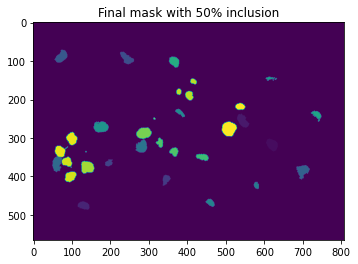

In [10]:
# We now perform the inclusion
mask_inclusion = perform_inclusion(merged_volume_mask.copy(), no_main_cells=20, inclusion_rate=0.5)

plt.imshow(mask_inclusion[slice_number])
plt.title('Final mask with 50% inclusion')
plt.show()

----

# Bias

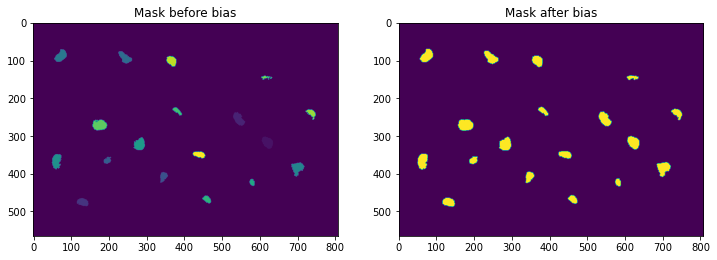

In [11]:
mask_bias = perform_bias(volume_main_mask.copy(), qmax=6)

fig, axs = plt.subplots(figsize=(12, 12), nrows=1, ncols=2)

axs[0].imshow(volume_main_mask[slice_number])
axs[0].set_title('Mask before bias')
axs[1].imshow(mask_bias[slice_number])
axs[1].set_title('Mask after bias')

plt.show()

----